# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>


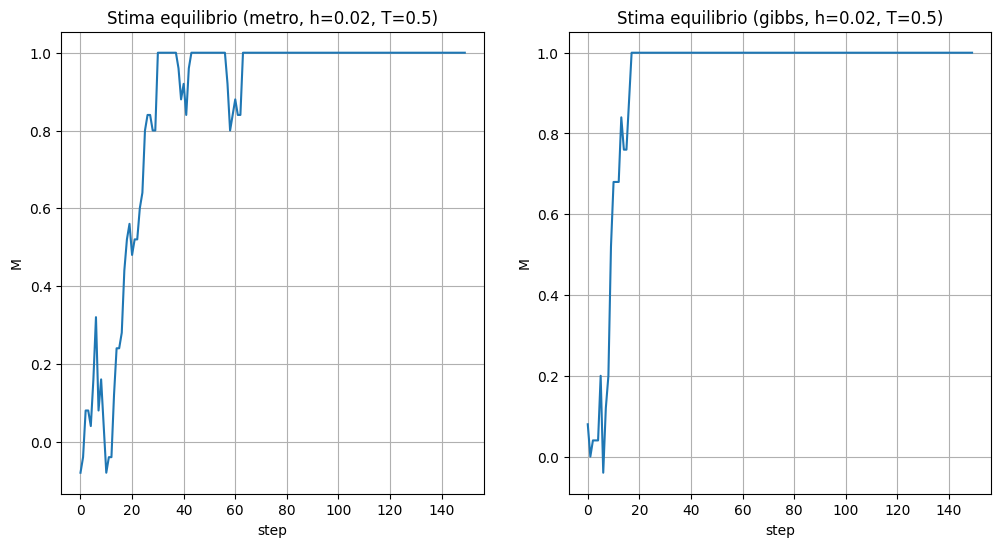

In [6]:
import matplotlib.pyplot as plt
import numpy as np

file_metro = np.loadtxt('equilibrium_out.txt')
file_gibbs = np.loadtxt('equilibrium_gibbs_out.txt') 
x = file_metro[:150, 0]
y = file_metro[:150, 1]
x_g = file_gibbs[:150, 0]
y_g = file_gibbs[:150, 1]

    
        
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.xlabel('step')
plt.ylabel('M')
plt.title('Stima equilibrio (metro, h=0.02, T=0.5)')
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(x_g, y_g)
plt.xlabel('step')
plt.ylabel('M')
plt.title('Stima equilibrio (gibbs, h=0.02, T=0.5)')
plt.grid(True)

plt.show()

Per verificare l'equilibrazione, è stato calcolato il valore istantaneo della magnetizzazione per viversi step.
Osservando i grafici riportati sopra, si è deciso, per equilibrare il sistema, di eseguire le successive simulazioni a seguito di 200 cicli di equilibrazione preventivi (tranne dove specificato).
L'equilibrazione è fondamentale poichè si verifica che solamente in condizione di equilibrio la probabilità che il sistema sia in un determinato stato è effettivamente proporzionale al peso di Boltzmann di tale stato.

In Statistical Mechanics the one-dimensional (1D) Ising Model is exactly resoluble. The Hamiltonian for a system of N spins with nearest neighbors interaction is given by (in the following I will assume units such that $\mu_B=1$ and $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$.

The partition function for $N$ spins, $Z$, can be exactly computed and it turns out to be:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
Once the partition function has been computed, the Helmholtz free energy is readly obtained as $A = -k_B T \ln Z$. All the thermodynamic quantities of interest can be deduced from $A$ or, equivalently, from $Z$:

- the **Internal Energy** per spin (with $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

In seguito sono riportate per ogni grandezza due serie di plot (ciascuna contentente il confronto tra i dati acquisiti con metro e Gibbs e la distribuzione attesa):
- la prima acquisita senza l'opzione RESTART (la configurazione di spin iniziale è disordinata e scorrelata per ogni simulazione da quella precedente) e senza alcun ciclo di equilibrazione;
- la secondo acquisita con l'opzione RESTART (la configurazione di spin iniziale è per ogni simulazione l'ultima di quella precedente).

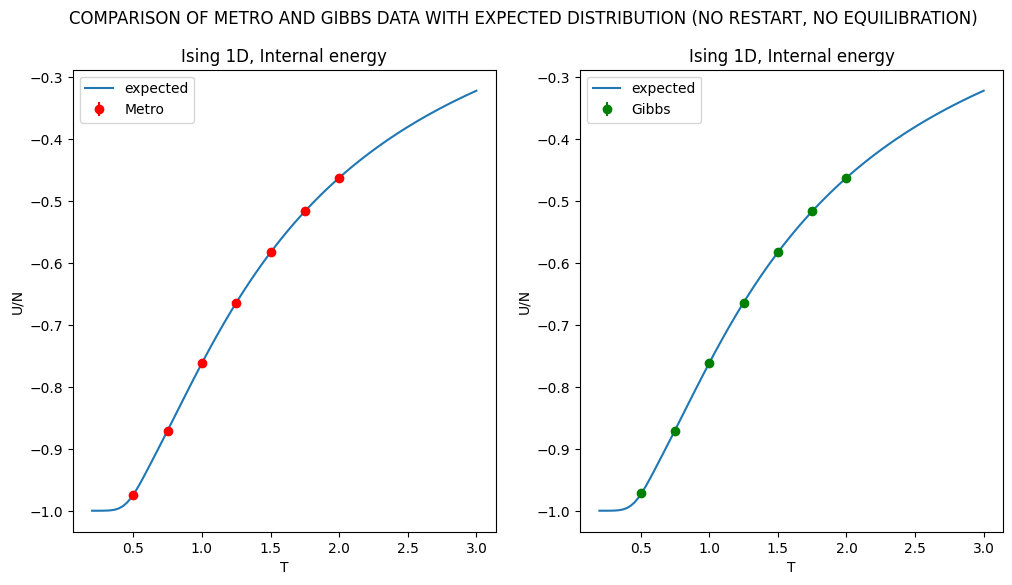

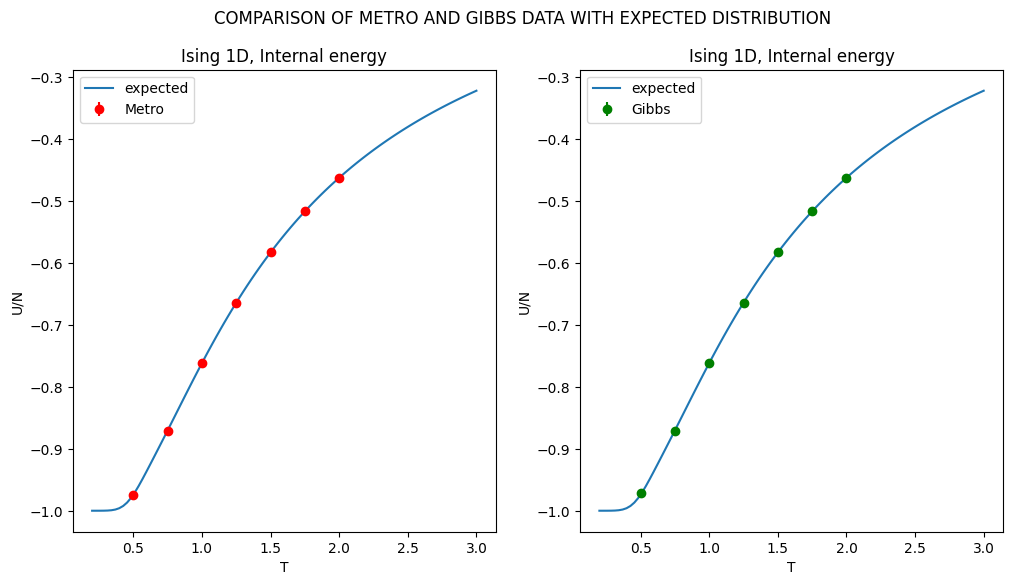

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Lettura dei dati dal file en_metro_out.txt
data_metro = np.loadtxt('en_metro_out.txt')

# Lettura dei dati dal file en_gibbs_out.txt
data_gibbs = np.loadtxt('en_gibbs_out.txt')

# Lettura dei dati dal file en_metro_restart_out.txt
data_metro_restart = np.loadtxt('en_metro_restart_out.txt')

# Lettura dei dati dal file en_gibbs_restart_out.txt
data_gibbs_restart = np.loadtxt('en_gibbs_restart_out.txt')

# Dati per il plot della curva esistente
points = 100
T = np.linspace(0.2, 3.0, num=points)
beta = 1 / T
J = 1.0
Ns = 50
th = np.tanh(J / T)
thN = th**Ns
ch = 1 / th
e = -J * (th + ch * thN) / (1 + thN)

# Primo grafico con i dati del file en_metro_out.txt
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(T, e, label='expected')
plt.errorbar(data_metro[:, 0], data_metro[:, 1], yerr=data_metro[:, 2], fmt='o', label='Metro', color='red')
plt.title('Ising 1D, Internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.legend()

# Secondo grafico con i dati del file en_gibbs_out.txt
plt.subplot(1, 2, 2)
plt.plot(T, e, label='expected')
plt.errorbar(data_gibbs[:, 0], data_gibbs[:, 1], yerr=data_gibbs[:, 2], fmt='o', label='Gibbs', color='green')
plt.title('Ising 1D, Internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.legend()

plt.suptitle('COMPARISON OF METRO AND GIBBS DATA WITH EXPECTED DISTRIBUTION (NO RESTART, NO EQUILIBRATION)')

#RESTART PLOT

# Primo grafico con i dati del file en_metro_restart_out.txt
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(T, e, label='expected')
plt.errorbar(data_metro_restart[:, 0], data_metro_restart[:, 1], yerr=data_metro_restart[:, 2], fmt='o', label='Metro', color='red')
plt.title('Ising 1D, Internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.legend()

# Secondo grafico con i dati del file en_gibbs_restart_out.txt
plt.subplot(1, 2, 2)
plt.plot(T, e, label='expected')
plt.errorbar(data_gibbs_restart[:, 0], data_gibbs_restart[:, 1], yerr=data_gibbs_restart[:, 2], fmt='o', label='Gibbs', color='green')
plt.title('Ising 1D, Internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.legend()

plt.suptitle('COMPARISON OF METRO AND GIBBS DATA WITH EXPECTED DISTRIBUTION')

plt.show()



- the **Heat Capacity** (with $h=0$):

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
= -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right] = \\
= -k_B\beta^2 \left[ -\sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \sum_{\{ s_i \}} H \exp \left( -\beta H\right)\frac{\partial Z^{-1}}{\partial \beta} \right] = \\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]\frac{1}{Z}\frac{\partial Z}{\partial \beta} \right\} =\\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} - \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]^2 \right\} =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

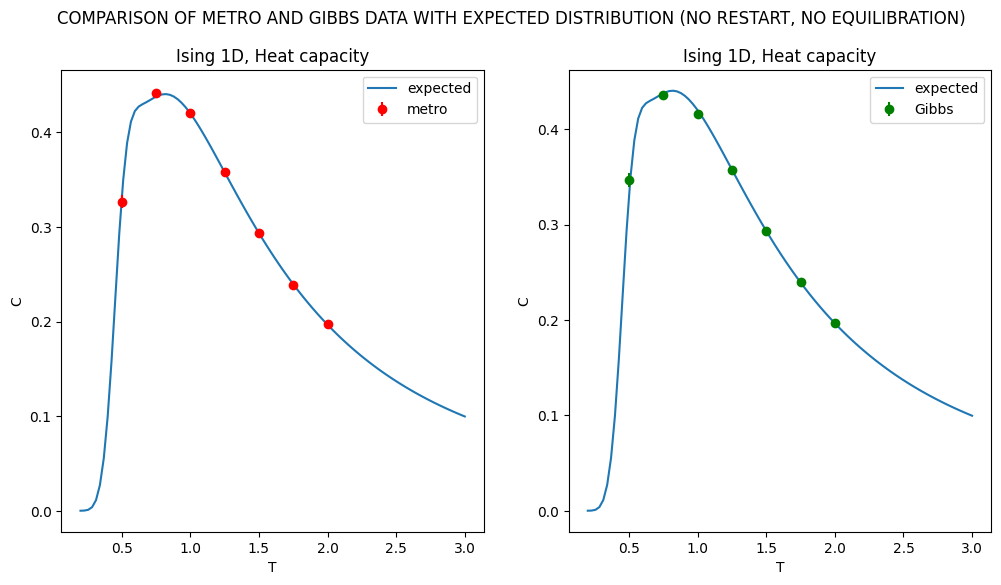

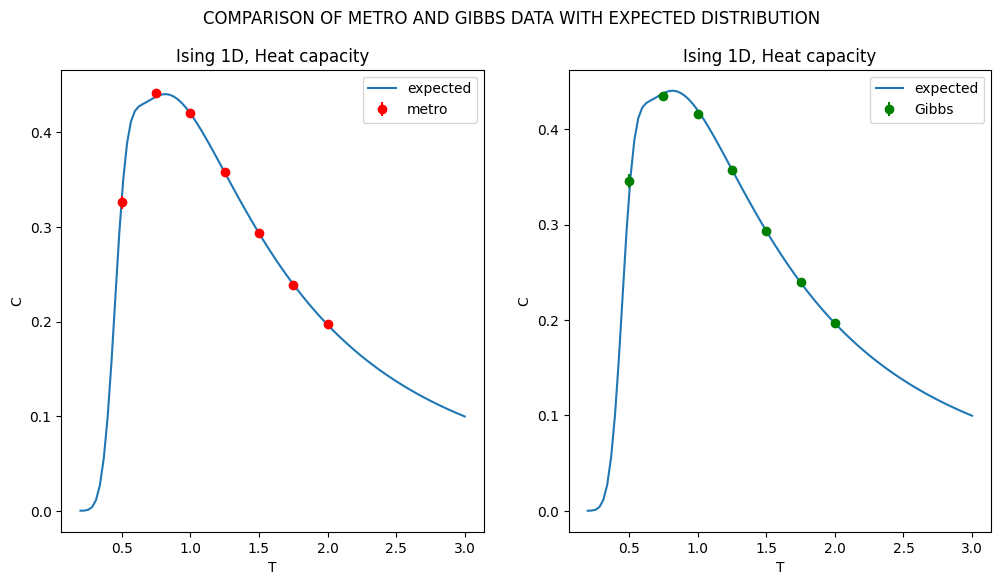

In [8]:
data_metro = np.loadtxt('heatcap_metro_out.txt')
data_gibbs = np.loadtxt('heatcap_gibbs_out.txt')

data_metro_restart = np.loadtxt('heatcap_metro_restart_out.txt')
data_gibbs_restart = np.loadtxt('heatcap_gibbs_restart_out.txt')

heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(T, heat, label='expected')
plt.title('Ising 1D, Heat capacity')
plt.errorbar(data_metro[:, 0], data_metro[:, 1], yerr=data_metro[:, 2], fmt='o', label='metro', color='red')
plt.xlabel('T')
plt.ylabel('C')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(T, heat, label='expected')
plt.title('Ising 1D, Heat capacity')
plt.errorbar(data_gibbs[:, 0], data_gibbs[:, 1], yerr=data_gibbs[:, 2], fmt='o', label='Gibbs', color='green')
plt.xlabel('T')
plt.ylabel('C')
plt.legend()

plt.suptitle('COMPARISON OF METRO AND GIBBS DATA WITH EXPECTED DISTRIBUTION (NO RESTART, NO EQUILIBRATION)')

#RESTART

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(T, heat, label='expected')
plt.title('Ising 1D, Heat capacity')
plt.errorbar(data_metro_restart[:, 0], data_metro_restart[:, 1], yerr=data_metro_restart[:, 2], fmt='o', label='metro', color='red')
plt.xlabel('T')
plt.ylabel('C')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(T, heat, label='expected')
plt.title('Ising 1D, Heat capacity')
plt.errorbar(data_gibbs_restart[:, 0], data_gibbs_restart[:, 1], yerr=data_gibbs_restart[:, 2], fmt='o', label='Gibbs', color='green')
plt.xlabel('T')
plt.ylabel('C')
plt.legend()

plt.suptitle('COMPARISON OF METRO AND GIBBS DATA WITH EXPECTED DISTRIBUTION')
plt.show()



Il calcolo della heat capacity è stato iniziato nel metodo "measure" di "system" (calcolando il quandrato dell'Hamiltoniana) ed è stato poi completato in "avereges" (aggiungendo la stima dell'energia interna).

- The **magnetization** (with $h \not= 0$):

Note that with $h=0$ the magnetization $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ because in 1D we cannot have a (ferromagnetic) phase transition in absence of an external magnetic field.

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

The exact formula from $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ is:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

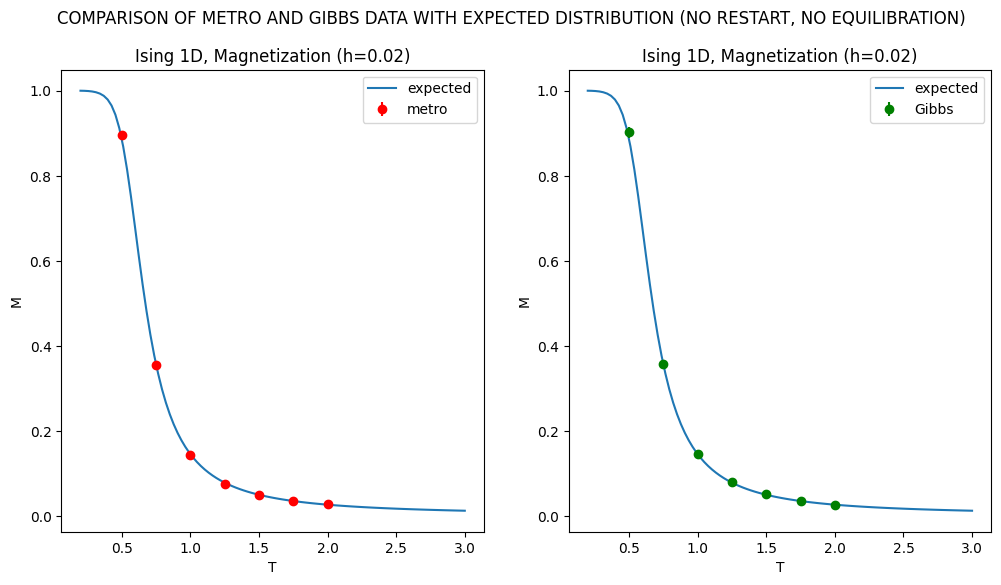

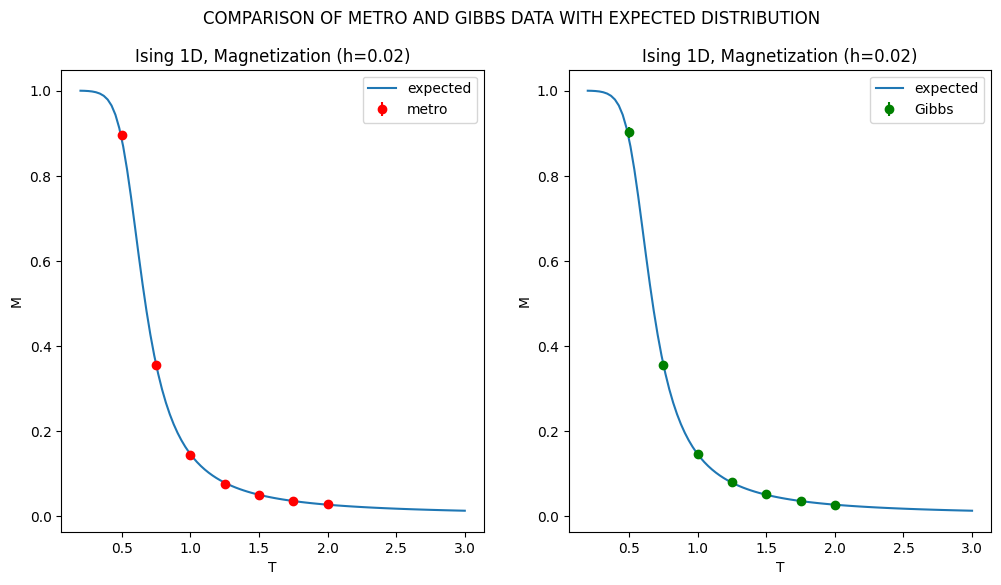

In [9]:
data_metro = np.loadtxt('mag_metro_out.txt')
data_gibbs = np.loadtxt('mag_gibbs_out.txt')

data_metro_restart = np.loadtxt('mag_metro_restart_out.txt')
data_gibbs_restart = np.loadtxt('mag_gibbs_restart_out.txt')

h=0.02 #external field
b = 1/T
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(T, M, label='expected')
plt.title('Ising 1D, Magnetization (h=0.02)')
plt.errorbar(data_metro[:, 0], data_metro[:, 1], yerr=data_metro[:, 2], fmt='o', label='metro', color='red')
plt.xlabel('T')
plt.ylabel('M')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(T, M, label='expected')
plt.title('Ising 1D, Magnetization (h=0.02)')
plt.errorbar(data_gibbs[:, 0], data_gibbs[:, 1], yerr=data_gibbs[:, 2], fmt='o', label='Gibbs', color='green')
plt.xlabel('T')
plt.ylabel('M')
plt.legend()

plt.suptitle('COMPARISON OF METRO AND GIBBS DATA WITH EXPECTED DISTRIBUTION (NO RESTART, NO EQUILIBRATION)')

#RESTART

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(T, M, label='expected')
plt.title('Ising 1D, Magnetization (h=0.02)')
plt.errorbar(data_metro_restart[:, 0], data_metro_restart[:, 1], yerr=data_metro_restart[:, 2], fmt='o', label='metro', color='red')
plt.xlabel('T')
plt.ylabel('M')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(T, M, label='expected')
plt.title('Ising 1D, Magnetization (h=0.02)')
plt.errorbar(data_gibbs_restart[:, 0], data_gibbs_restart[:, 1], yerr=data_gibbs_restart[:, 2], fmt='o', label='Gibbs', color='green')
plt.xlabel('T')
plt.ylabel('M')
plt.legend()

plt.suptitle('COMPARISON OF METRO AND GIBBS DATA WITH EXPECTED DISTRIBUTION')
plt.show()

- The **magnetic susceptibility** (with $h=0$):

$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} =\\
= \beta\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right]^2 \frac{\exp \left( -\beta H\right)}{Z}
-\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z}
\frac{1}{Z}\frac{\partial Z}{\partial h} = 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

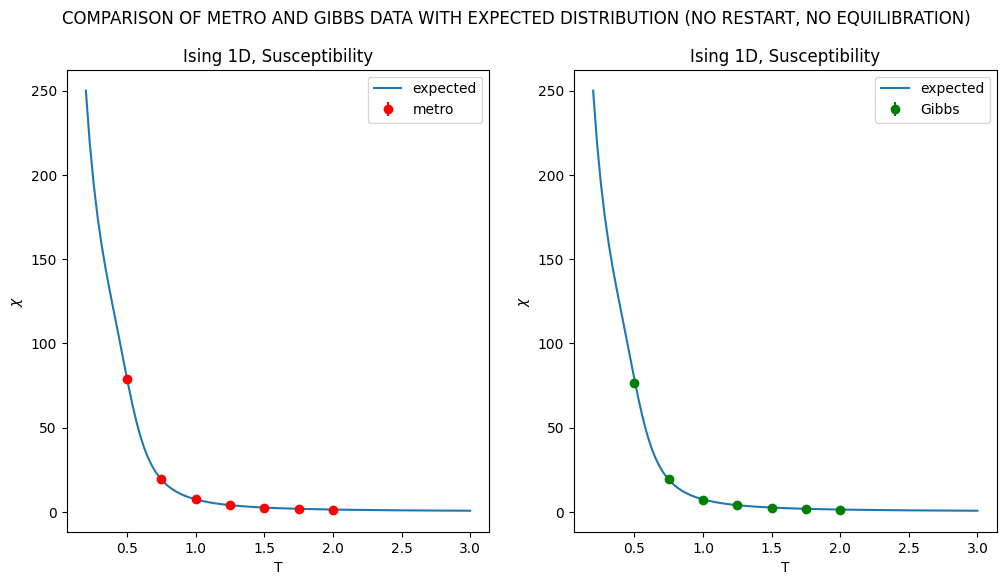

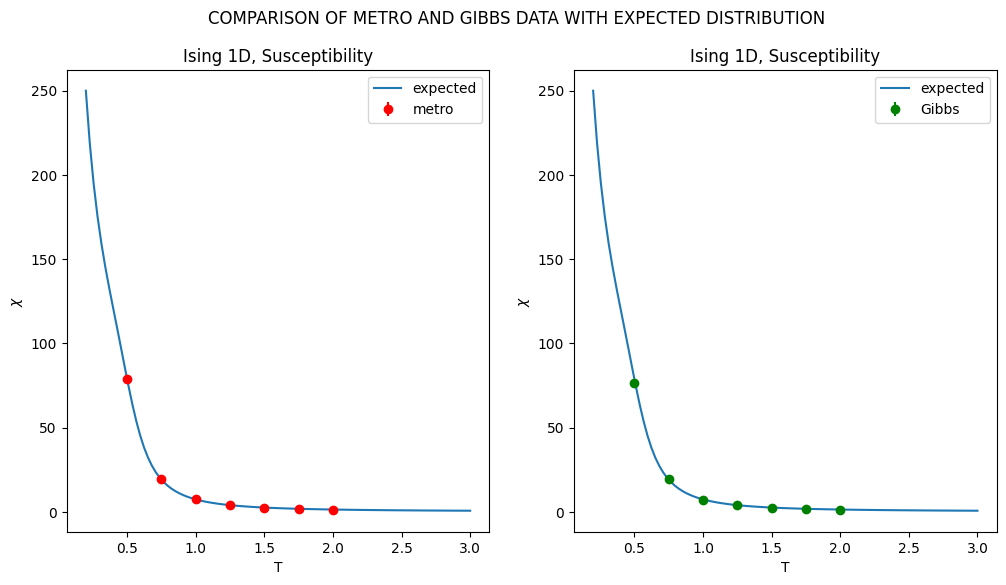

In [10]:
data_metro = np.loadtxt('susc_metro_out.txt')
data_gibbs = np.loadtxt('susc_gibbs_out.txt')

data_metro_restart = np.loadtxt('susc_metro_restart_out.txt')
data_gibbs_restart = np.loadtxt('susc_gibbs_restart_out.txt')

X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(T, X, label='expected')
plt.title('Ising 1D, Susceptibility')
plt.errorbar(data_metro[:, 0], data_metro[:, 1], yerr=data_metro[:, 2], fmt='o', label='metro', color='red')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(T, X, label='expected')
plt.title('Ising 1D, Susceptibility')
plt.errorbar(data_gibbs[:, 0], data_gibbs[:, 1], yerr=data_gibbs[:, 2], fmt='o', label='Gibbs', color='green')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.legend()

plt.suptitle('COMPARISON OF METRO AND GIBBS DATA WITH EXPECTED DISTRIBUTION (NO RESTART, NO EQUILIBRATION)')

#RESTART

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(T, X, label='expected')
plt.title('Ising 1D, Susceptibility')
plt.errorbar(data_metro_restart[:, 0], data_metro_restart[:, 1], yerr=data_metro_restart[:, 2], fmt='o', label='metro', color='red')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(T, X, label='expected')
plt.title('Ising 1D, Susceptibility')
plt.errorbar(data_gibbs_restart[:, 0], data_gibbs_restart[:, 1], yerr=data_gibbs_restart[:, 2], fmt='o', label='Gibbs', color='green')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.legend()

plt.suptitle('COMPARISON OF METRO AND GIBBS DATA WITH EXPECTED DISTRIBUTION')

plt.show()

### Exercise 06.1

Complete the NSL_simulator code to simulate a 1D Ising model with the Gibbs sampling algorithm (the Metropolis algorithm is already implemented) to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$. Verify the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

- <span style="color:red">Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties</span> obtained with a large number of *MC steps* (e.g. $M\ge 10^5$) compared with the exact curves. In the same picture show your results obtained with <span style="color:blue">both sampling methods, Metropolis and Gibbs</span>.

A Monte Carlo step will consist in trying to flip one time all the spins of the system. Do not forget to equilibrate your simulations and to use blocking average with blocks large enough.

COMMENTI:
Si verifica che in tutti i casi presentati c'è una buona compatibilità con gli andamenti attesi.
In particolare, sia tramite il metodo di Gibbs sia tramite Metropolis, i risultati sono compatibili tra loro e con gli andamenti analitici.
Inoltre, la compatibilità si ottiene anche senza operare alcun tipo di equilibrazione preventiva e senza operare il "RESTART" (ossia, senza imporre che, ad ogni temperatura, la configurazione iniziale sia l'ultima di quella precedente). 

Il metodo di campionamento di Gibbs è stato implementato nel modo seguente:
- la probabilità da calcolare è p = 1/(1 + exp(- beta * Delta_E));
- di conseguenza, la prima cosa da fare è calcolare Delta_E: si tratta della differenza di energia tra le 2 configurazioni (spin down e spin up,   considerando solamente le interazioni con primi vicini) ed è la stessa che compare nel peso di Boltzmann che si campiona nel caso del Metropolis; 
- si compie un'estrazione casuale (ran) di un numero in [0,1]:
    - se p > ran, lo spin della particella in esame diventa up (indipendentemente dal suo precedente valore);
    - se p < ran, lo spin della particella in esame diventa down (indipendentemente dal suo precedente valore).
    
In questo senso, quindi, il metodo di Gibbs ha sempre accettazione 1: tutte le mosse proposte vengono accettate, indipendentemente dal valore precedente dello spin della particella.